## 📘 Análisis Estadístico Descriptivo de Autos Usados en India

### 📌 Contexto

El dataset utilizado proviene del portal **CarDekho**, una plataforma india de venta de autos nuevos y usados. Contiene información de miles de autos listados en India con variables como:

* Marca del auto
* Año de fabricación
* Precio de venta
* Tipo de combustible
* Número de propietarios
* Transmisión
* Kilometraje recorrido

El objetivo de esta notebook es aplicar técnicas de estadística descriptiva y visualización de datos para entender mejor la distribución de precios, el estado general de los autos y sus características clave.

### 🔧 1. Carga de librerías y datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
plt.style.use('ggplot')

# sns.set(font_scale=1.1) set is deprecated, use sns.set_theme instead
sns.set_theme(context='notebook', style='whitegrid', font_scale=1.1)

# Cargar el dataset
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

# Mostrar las primeras filas
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### 🔍 2. Exploración inicial del dataset

In [3]:
# Dimensiones
print("Filas y columnas:", df.shape)
print()

# Nombres de columnas
print("Columnas:", df.columns)
print()

# Tipos de datos
df.info()
print()

# Estadísticas básicas
print("Estadísticas descriptivas:")
df.describe()


Filas y columnas: (4340, 8)

Columnas: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB

Estadísticas descriptivas:


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### 📊 3. Medidas de tendencia central

Vamos a calcular la media, mediana y moda del precio de venta (selling_price) y los kilómetros recorridos (km_driven).

In [4]:
# Precio de venta
print("Media precio:", df['selling_price'].mean())
print("Mediana precio:", df['selling_price'].median())
print("Moda precio:", df['selling_price'].mode()[0])

# Kilometraje
print("Media km:", df['km_driven'].mean())
print("Mediana km:", df['km_driven'].median())
print("Moda km:", df['km_driven'].mode()[0])


Media precio: 504127.3117511521
Mediana precio: 350000.0
Moda precio: 300000
Media km: 66215.77741935484
Mediana km: 60000.0
Moda km: 70000


### 📈 4. Medidas de dispersión
Calculamos el rango, la varianza y la desviación estándar.

In [5]:
# Rango
print("Rango precio:", df['selling_price'].max() - df['selling_price'].min())

# Varianza y desviación estándar
print("Varianza precio:", df['selling_price'].var())
print("Desviación estándar precio:", df['selling_price'].std())

print("Varianza km:", df['km_driven'].var())
print("Desviación estándar km:", df['km_driven'].std())


Rango precio: 8880000
Varianza precio: 334718640087.90295
Desviación estándar precio: 578548.7361388865
Varianza km: 2175672269.448949
Desviación estándar km: 46644.102193620885


### 📉 5. Visualización de variables numéricas

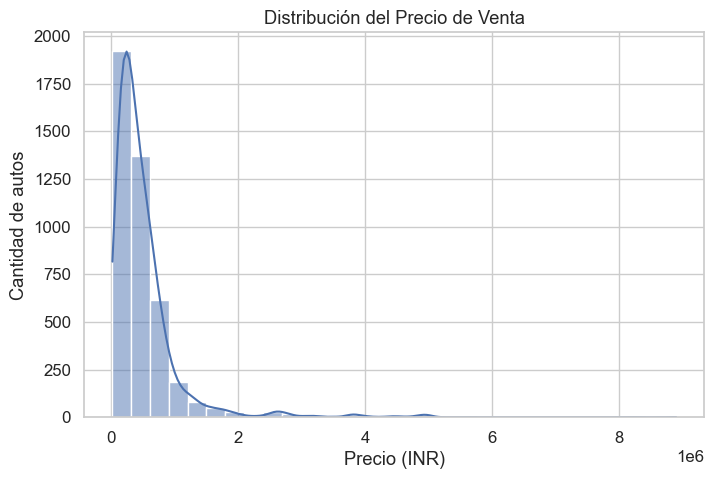

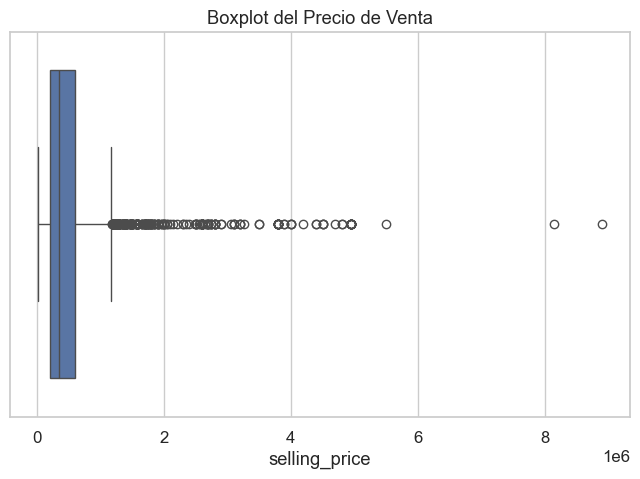

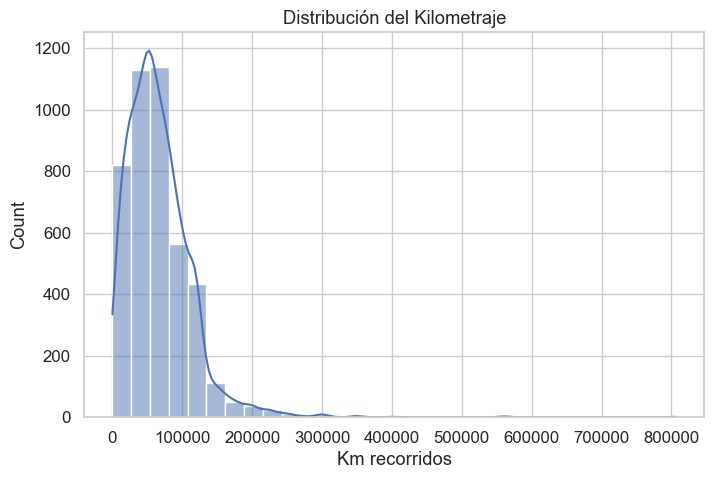

In [6]:
# Histograma de precios
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio (INR)')
plt.ylabel('Cantidad de autos')
plt.show()

# Boxplot para detectar outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot del Precio de Venta')
plt.show()

# Histograma del kilometraje
plt.figure(figsize=(8,5))
sns.histplot(df['km_driven'], bins=30, kde=True)
plt.title('Distribución del Kilometraje')
plt.xlabel('Km recorridos')
plt.show()


### 🔗 6. Relación entre variables

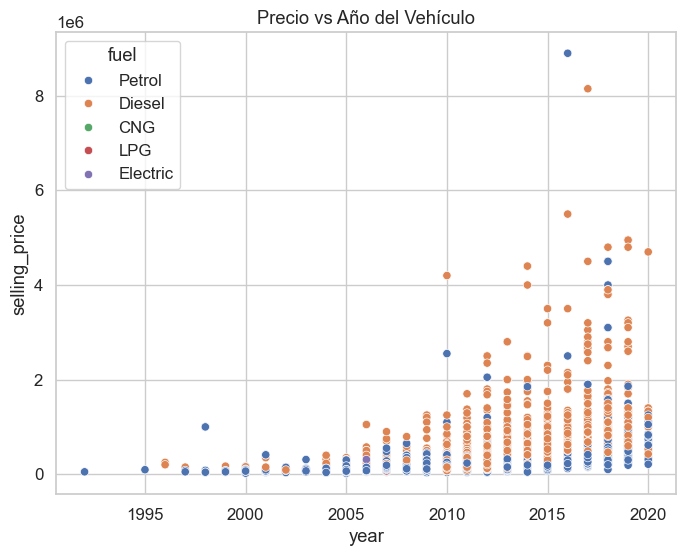

,selling_price,year,km_driven
selling_price,1.000000,0.413922,-0.192289
year,0.413922,1.000000,-0.419688
km_driven,-0.192289,-0.419688,1.000000


In [7]:
# Precio vs Año
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel')
plt.title('Precio vs Año del Vehículo')
plt.show()

# Correlación numérica
df[['selling_price', 'year', 'km_driven']].corr()


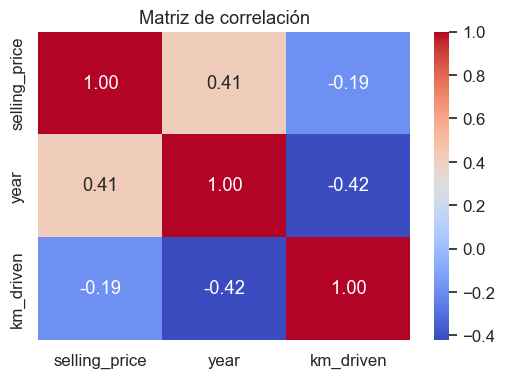

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['selling_price', 'year', 'km_driven']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## ✅ Actividades Prácticas

1. ¿Cuál es el promedio de autos listados por año? Graficá la cantidad de autos por año.
2. Calculá la media, mediana y moda del `year` (año del vehículo).
3. Realizá un boxplot del kilometraje recorrido (`km_driven`) para detectar outliers.
4. Calculá el rango, varianza y desviación estándar del `year`.
5. Hacé un histograma del `selling_price` para autos que usan combustible "Diesel".
6. Graficá la distribución de autos por tipo de transmisión (`manual` vs `automatic`).
7. ¿Cuál es la relación entre el tipo de combustible (`fuel`) y el precio promedio de venta?
8. Usando un `groupby`, obtené el precio medio por año de fabricación.
9. Mostrá en un gráfico de barras cuántos autos pertenecen a cada número de dueños (`owner`).
10. Calculá las medidas de dispersión para el precio de autos automáticos únicamente.

1. ¿Cuál es el promedio de autos listados por año? Graficá la cantidad de autos por año.

In [25]:
autos_por_anio = df['year'].value_counts().sort_index()
print(f'Promedio de autos por año:\n{autos_por_anio.mean():.2f}')

Promedio de autos por año:
160.74


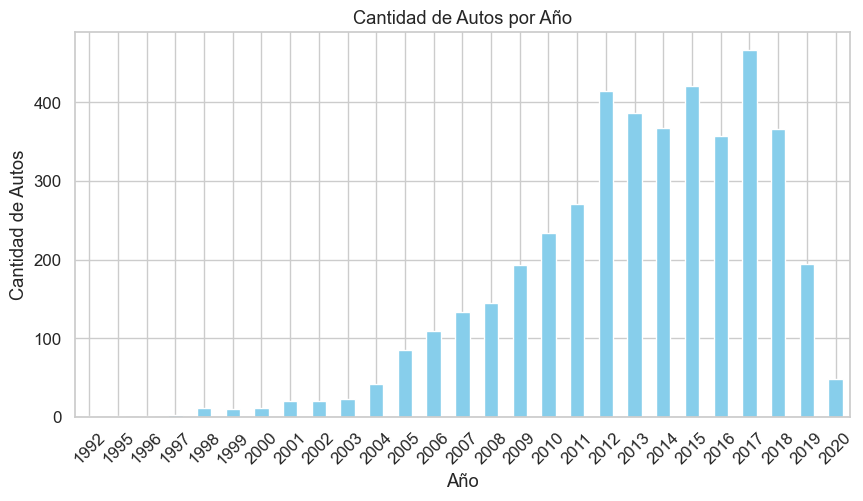

In [10]:
plt.figure(figsize=(10,5))
autos_por_anio.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Autos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Autos')
plt.xticks(rotation=45)
plt.show()

2. Calculá la media, mediana y moda del `year` (año del vehículo).

In [11]:
media_year = df['year'].mean()
mediana_year = df['year'].median()
moda_year = df['year'].mode()[0]
print(f"Media del año del vehículo: {media_year:.2f}")
print(f"Mediana del año del vehículo: {mediana_year}")
print(f"Moda del año del vehículo: {moda_year}")

Media del año del vehículo: 2013.09
Mediana del año del vehículo: 2014.0
Moda del año del vehículo: 2017


3. Realizá un boxplot del kilometraje recorrido (`km_driven`) para detectar outliers.

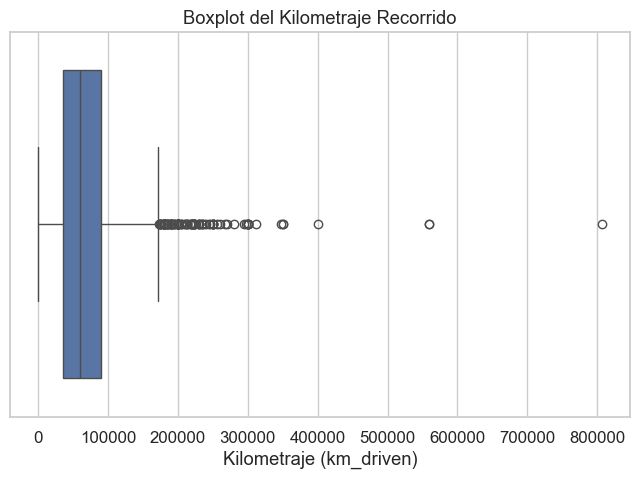

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['km_driven'])
plt.title('Boxplot del Kilometraje Recorrido')
plt.xlabel('Kilometraje (km_driven)')
plt.show()

4. Calculá el rango, varianza y desviación estándar del `year`.

In [13]:
rango_year = df['year'].max() - df['year'].min()
varianza_year = df['year'].var()
desviacion_year = df['year'].std()
print(f"Rango del año del vehículo: {rango_year}")
print(f"Varianza del año del vehículo: {varianza_year:.2f}")
print(f"Desviación estándar del año del vehículo: {desviacion_year:.2f}")

Rango del año del vehículo: 28
Varianza del año del vehículo: 17.77
Desviación estándar del año del vehículo: 4.22


5. Hacé un histograma del `selling_price` para autos que usan combustible "Diesel".

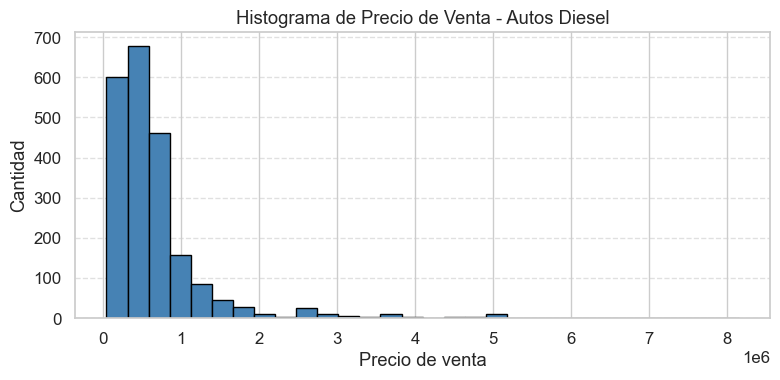

In [36]:
diesel = df[df['fuel'] == 'Diesel']
plt.figure(figsize=(8,4))
plt.hist(diesel['selling_price'], bins = 30, color = 'steelblue', edgecolor = 'black')
plt.title('Histograma de Precio de Venta - Autos Diesel')
plt.xlabel('Precio de venta')
plt.ylabel('Cantidad')
plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

6. Graficá la distribución de autos por tipo de transmisión (`manual` vs `automatic`).

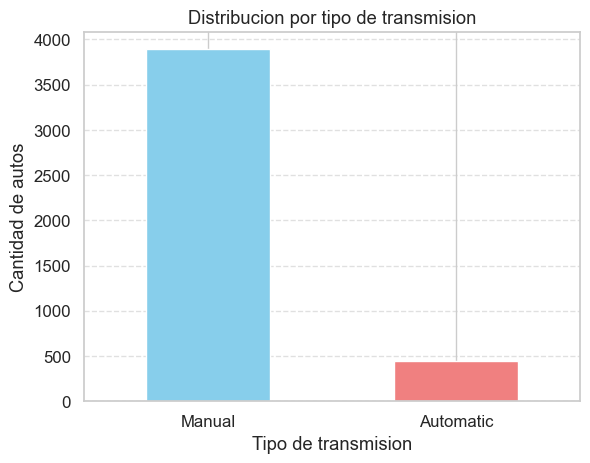

In [15]:
transmision = df['transmission'].value_counts()
plt.Figure(figsize=(6,4))
transmision.plot(kind = 'bar', color = ['skyblue', 'lightcoral'])
plt.title('Distribucion por tipo de transmision')
plt.xlabel('Tipo de transmision')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.show()

7. ¿Cuál es la relación entre el tipo de combustible (`fuel`) y el precio promedio de venta?

In [40]:
precio_promedio_por_combustible = df.groupby('fuel')['selling_price'].mean().sort_values(ascending = False)
print(f'Precio promedio por combustible:\n{precio_promedio_por_combustible}')

Precio promedio por combustible:
fuel
Diesel      669094.252206
Petrol      344840.137541
Electric    310000.000000
CNG         277174.925000
LPG         167826.043478
Name: selling_price, dtype: float64


8. Usando un `groupby`, obtené el precio medio por año de fabricación.

In [52]:
precio_medio_por_anio = df.groupby('year')['selling_price'].mean()
print(f'Precio medio por año:\n{precio_medio_por_anio}')

Precio medio por año:
year
1992    5.000000e+04
1995    9.500000e+04
1996    2.250000e+05
1997    9.300000e+04
1998    2.140000e+05
1999    7.350000e+04
2000    8.150000e+04
2001    1.176499e+05
2002    9.071429e+04
2003    8.656522e+04
2004    1.217500e+05
2005    1.090130e+05
2006    1.577999e+05
2007    1.628284e+05
2008    1.742013e+05
2009    2.295647e+05
2010    2.696781e+05
2011    2.936383e+05
2012    3.716289e+05
2013    4.848010e+05
2014    5.232316e+05
2015    5.289430e+05
2016    6.083641e+05
2017    7.689098e+05
2018    9.107705e+05
2019    1.059020e+06
2020    8.184791e+05
Name: selling_price, dtype: float64


9. Mostrá en un gráfico de barras cuántos autos pertenecen a cada número de dueños (`owner`).

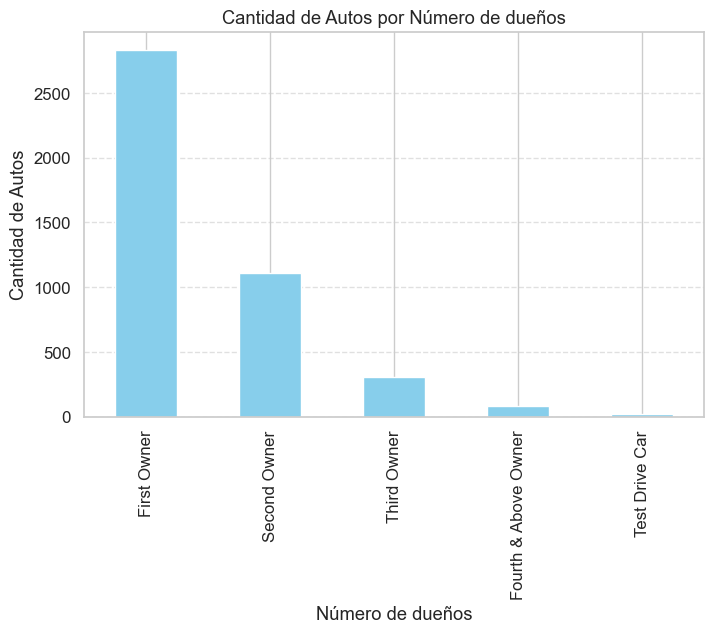

In [57]:
conteo_autos_por_owner = df['owner'].value_counts()

plt.figure(figsize=(8,5))
conteo_autos_por_owner.plot(kind='bar', color='skyblue')

plt.title('Cantidad de Autos por Número de dueños')
plt.xlabel('Número de dueños')
plt.ylabel('Cantidad de Autos')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

10. Calculá las medidas de dispersión para el precio de autos automáticos únicamente.

In [58]:
autos_automaticos = df[df['transmission'] == 'Automatic']
precio_auto = autos_automaticos['selling_price']

#calculando medidas de dispersion
rango = precio_auto.max() - precio_auto.min()
varianza_auto = precio_auto.var()
desviacion_auto = precio_auto.std()

print(f"Rango del precio de autos automáticos: {rango:.2f}")
print(f"Varianza del precio de autos automáticos: {varianza_auto:.2f}")
print(f"Desviación estándar del precio de autos automáticos: {desviacion_auto:.2f}")

Rango del precio de autos automáticos: 8821000.00
Varianza del precio de autos automáticos: 1650915276494.94
Desviación estándar del precio de autos automáticos: 1284879.48
